# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice. (249)
results_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Should get "array(['g989'], dtype=object)"
duplicate_ID = results_df.loc[results_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID_df = results_df.loc[results_df["Mouse ID"] == "g989", :]
duplicate_ID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results_df = results_df.drop(results_df[results_df["Mouse ID"] == "g989"].index)
clean_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_results_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_results_df["Tumor Volume (mm3)"].groupby(clean_results_df["Drug Regimen"]).mean()
median = clean_results_df["Tumor Volume (mm3)"].groupby(clean_results_df["Drug Regimen"]).median()
variance = clean_results_df["Tumor Volume (mm3)"].groupby(clean_results_df["Drug Regimen"]).var()
std_dev = clean_results_df["Tumor Volume (mm3)"].groupby(clean_results_df["Drug Regimen"]).std()
std_err = clean_results_df["Tumor Volume (mm3)"].groupby(clean_results_df["Drug Regimen"]).sem()

summary = pd.DataFrame({"Mean Tumor Volume":mean,
                        "Median Tumor Volume":median,
                        "Tumor Volume Variance":variance,
                        "Tumor Volume Std. Dev.":std_dev,
                        "Tumor Volume Std. Err.":std_err
})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate = clean_results_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Bar Chart: Get x and y values/labels
regimens = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
x_axis = [1,2,3,4,5,6,7,8,9,10]
y_axis = clean_results_df["Drug Regimen"].value_counts()
y_axis

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

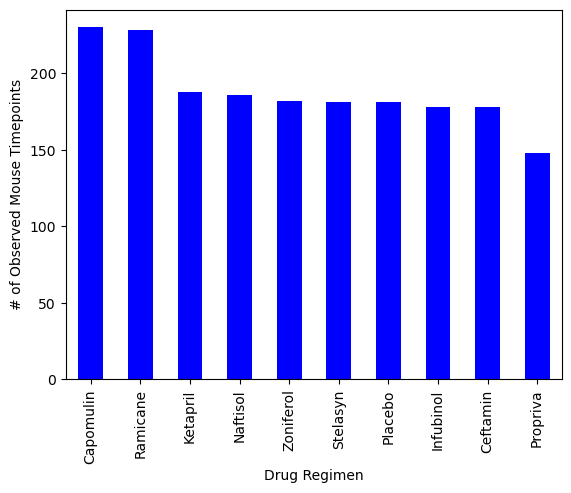

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
y_axis.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

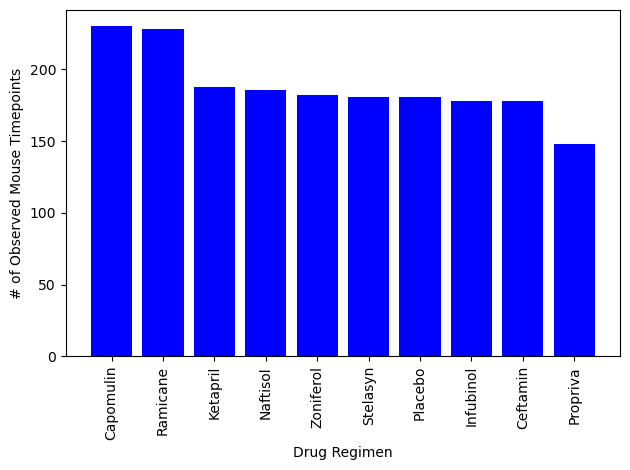

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis, y_axis, color='b', align="center")
plt.xticks(x_axis, regimens, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()

<Axes: ylabel='Sex'>

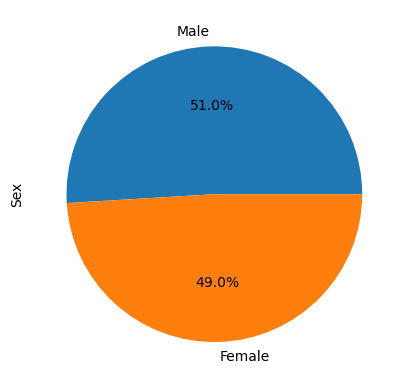

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_results_df["Sex"].value_counts()
pie_data.plot.pie(autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

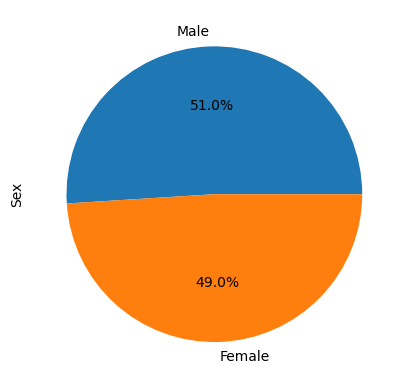

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
mice_total = pie_data[0]+pie_data[1]
pie_pyplot_data = [round(pie_data[0]/mice_total*100),round(pie_data[1]/mice_total*100)]
plt.pie(pie_pyplot_data, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_results_df.loc[clean_results_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_results_df.loc[clean_results_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_results_df.loc[clean_results_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_results_df.loc[clean_results_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last_time = pd.DataFrame(capomulin_df.groupby("Mouse ID").max()["Timepoint"])
ramicane_last_time = pd.DataFrame(ramicane_df.groupby("Mouse ID").max()["Timepoint"])
infubinol_last_time = pd.DataFrame(infubinol_df.groupby("Mouse ID").max()["Timepoint"])
ceftamin_last_time = pd.DataFrame(ceftamin_df.groupby("Mouse ID").max()["Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# use only keys from ######_last_time (left)
capomulin_merge = pd.merge(capomulin_last_time, clean_results_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_merge = pd.merge(ramicane_last_time, clean_results_df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_merge = pd.merge(infubinol_last_time, clean_results_df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_merge = pd.merge(ceftamin_last_time, clean_results_df, on=("Mouse ID", "Timepoint"), how="left")


In [15]:
# Testing:

# Get tumor volume data
capomulin_vol = capomulin_merge["Tumor Volume (mm3)"]
ramicane_vol = ramicane_merge["Tumor Volume (mm3)"]
infubinol_vol = infubinol_merge["Tumor Volume (mm3)"]
ceftamin_vol = ceftamin_merge["Tumor Volume (mm3)"]

capomulin_quartiles = capomulin_vol.quantile([0.25,0.5,0.75])
ramicane_quartiles = ramicane_vol.quantile([0.25,0.5,0.75])
infubinol_quartiles = infubinol_vol.quantile([0.25,0.5,0.75])
ceftamin_quartiles = ceftamin_vol.quantile([0.25,0.5,0.75])



In [16]:
# unfinished @Elise

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"]
# boxplot_df = clean_results_df[clean_results_df["Drug Regimen"].isin(treatments)]
# last_times = boxplot_df.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)"))
# last_times
                                                                              
# # Create empty list to fill with tumor vol data (for plotting)
# vol = [] # holds tumor volume data

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# for regimen in regimens:
    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
#     # add subset
#     quartiles = last_times[regimen].quantile([0.25,0.5,0.75]).round(2)
#     lowerq = quartiles[0.25].round(2)
#     upperq = quartiles[0.75].round(2)
#     iqr = round(upperq-lowerq,2)
    
#     # Determine outliers using upper and lower bounds
#     lower_bound = round(lowerq - (1.5*iqr),2)
#     upper_bound = round(upperq + (1.5*iqr),2)

#     print(f"{regimen}'s potential outliers: ")

# # Expected Result:
# # Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# # Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# # Infubinol's potential outliers: 31    36.321346
# # Name: Tumor Volume (mm3), dtype: float64
# # Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

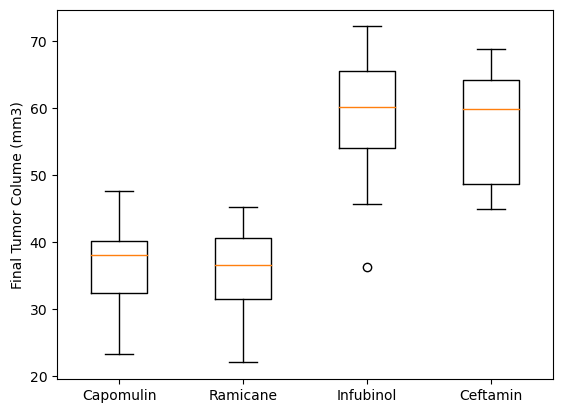

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Labels & data
boxplot_data = [capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol]

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Colume (mm3)")
ax1.boxplot(boxplot_data, labels=treatments)
plt.show()

## Line and Scatter Plots

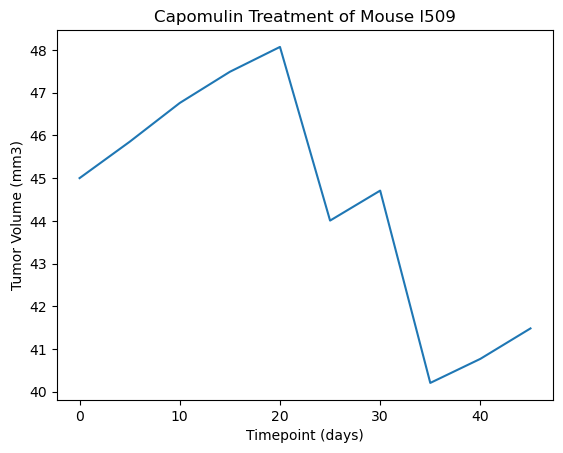

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_df = clean_results_df.loc[clean_results_df["Mouse ID"] == "l509",:]

line_x = line_plot_df["Timepoint"]
line_y = line_plot_df["Tumor Volume (mm3)"]

plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(line_x, line_y)

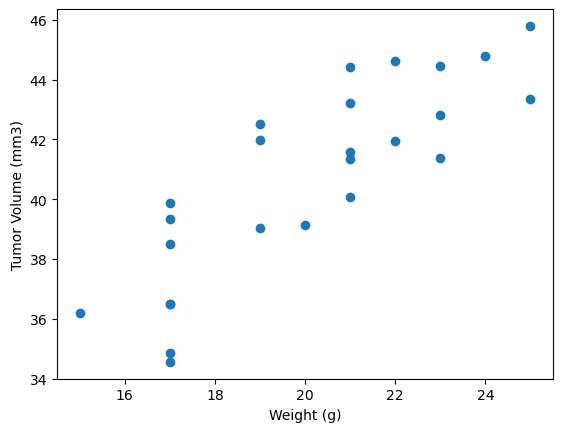

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_tumor_df = clean_results_df.loc[clean_results_df["Drug Regimen"] == "Capomulin", :]
scatter_plot_df = capomulin_tumor_df.groupby(["Mouse ID"]).mean()
# scatter_plot_df.head()
scatter_x = scatter_plot_df["Weight (g)"]
scatter_y = scatter_plot_df["Tumor Volume (mm3)"]

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(scatter_x, scatter_y)

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Used code structure from 5.3 Data Visualization Solved file for the following:

# Correlation Coefficient
capomulin_vol_mean_df = capomulin_df.groupby("Mouse ID").mean()
capomulin_corr_coeff = round(st.pearsonr(capomulin_vol_mean_df['Weight (g)'],capomulin_vol_mean_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {capomulin_corr_coeff}")

The correlation between mouse weight and the average tumor volume is 0.84


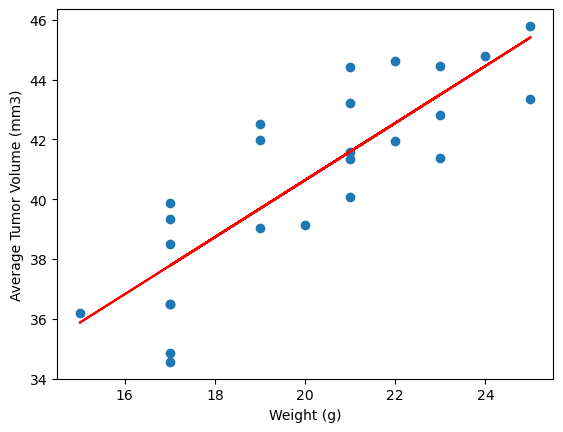

In [35]:
# Linear Regression Model
lin_regress_x = capomulin_vol_mean_df["Weight (g)"]
lin_regress_y = capomulin_vol_mean_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lin_regress_x, lin_regress_y)
regression_vals = lin_regress_x * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lin_regress_x, lin_regress_y)
plt.plot(lin_regress_x,regression_vals,"r-")
plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()